# 7장 신경망 · 딥러닝

### 뉴런모델

- D=2의 경우 입력 x0,x1과 항상 1의 더미 입력 x2  
- 입력 총합 a는 입력 x에 w를 곱한 수의 합으로 구한다 : a = w0x0 + w1x1 + w2x2
- 입력 총합 a에 시그모이드 함수를 통해서 출력 y를 구한다.

### 신경망 모델

신호가 되돌아가는 경로가 없이, 한 방향으로만 흐르는 '피드 포워드 신경망'  
  
2층의 피드 포워드 신경망  
- 중간층의 입력 총합 : bj = Σwjixi
- 중간층의 출력 : zj = h(bj)
- 출력층의 입력 총합 : ak= Σvkzj
- 출력층의 출력 : yk = exp(ak)/u

In [1]:
import numpy as np

np.random.seed(1)
N =200
K =3
T = np.zeros((N,3),dtype=np.uint8)
X = np.zeros((N,2))
X_range0 = [-3,3]
X_range1 = [-3,3]
Mu = np.array([[-.5,-.5],[.5,1.0],[1,-.5]]) #분포의 중심
Sig = np.array([[.7,.7],[.8,.3],[.3,.8]]) #분포의 분산
Pi = np.array([0.4,0.8,1]) #각 분포에 대한 비율
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        T[n,k]=1
        break
    for k in range(2):
        X[n,k]=(np.random.randn()*Sig[T[n,:]==1,k] + Mu[T[n,:]==1,k])

In [2]:
TestRatio = 0.5
X_n_training = int(N*TestRatio)
X_train = X[:X_n_training,:]
X_test = X[X_n_training:,:]
T_train = T[:X_n_training,:]
T_test = T[X_n_training:,:]


np.savez('class_data.npz',X_train=X_train,T_train=T_train,X_test=X_test,T_test=T_test,X_range0=X_range0,X_range1=X_range1)

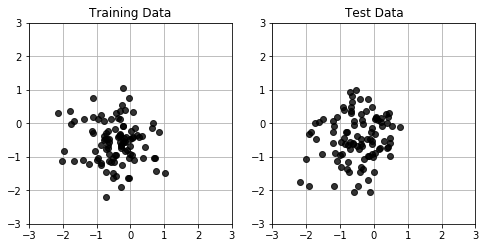

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def Show_data(x,t):
    
    wk , n =t.shape
    c=[[0,0,0],[.5,.5,.5],[1,1,1]]
    for i in range(n):
        k=c[i]
        plt.plot(x[t[:,i]==1,0],x[t[:,i]==1,1],linestyle='none',marker='o',markeredgecolor='black',color=k,alpha=0.8)
    plt.grid(True)
    
plt.figure(1,figsize=(8,3.7))
plt.subplot(1,2,1)
Show_data(X_train,T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1,2,2)
Show_data(X_test,T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()


2층의 피드 포워드 신경망을 정의하는 함수 FNN    

네트워크의 입력x를 받아 y를 출력  
(입력 x는 D차원 벡터, 입력 y는 K차원 벡터)  
    
1. x를 N × D, y를 N × K 행렬로  
2. 중간층의 수와 출력의 차원을 각각 M,K  
3. 중간층 가중치 W와 출력층의 가중치 V (W는 M × (D+1) 행렬로, V는 K × (M+1)행렬로)
4. W와 V의 정보는 W,V를 한 덩어리로 한 벡터 wv로 전달 (wv의 길이는 M × (D+1) + K × (M+1) )
5. FNN의 출력은 N개의 데이터에 대응한 출력 y와 중간층의 출력 z, 출력층과 중간층의 입력 총합 a,v도 출력함

In [10]:
def Sigmoid(x): #시그모이드 함수
    y = 1/(1+np.exp(-x))
    return y
#네트워크
def FNN(wv,M,K,x):
    N,D=x.shape #입력 차원
    w = wv[:M*(D+1)] # 중간층 뉴런의 가중치
    w = w.reshape(M,(D+1)) 
    v = wv[M*(D+1):] # 출력층 뉴런의 가중치
    v = v.reshape(K,(M+1))
    b = np.zeros((N,M+1)) #중간층 뉴런의 입력 총합
    z = np.zeros((N,M+1)) #중간층 뉴런의 출력
    a = np.zeros((N,K)) #출력층 뉴런의 입력 총합
    y = np.zeros((N,K)) #출력층 뉴런의 출력
    for n in range(N):
    #중간층 계산
        for m in range(M):
            b[n,m]=np.dot(w[m,:],np.r_[x[n,:],1])
            z[n,m] = Sigmoid(b[n,m])
    #출력층 계산
        z[n,M]=1 #더미 뉴런
        wkz = 0
        for k in range(K):
            a[n,k]=np.dot(v[k,:],z[n,:])
            wkz=wkz+np.exp(a[n,k])
        for k in range(K):
            y[n,k]=np.exp(a[n,k])/wkz
    return y,a,z,b
    
WV=np.ones(15)
M=2
K=3
FNN(WV,M,K,X_train[:2,:])

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[1.58812455, 1.58812455, 1.58812455],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.29406228, 0.29406228, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[-0.87573545, -0.87573545,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))